# Programmation orientée objet

In [1]:
class Walker:
    x = 0
    y = 0

In [2]:
a = Walker()

In [3]:
a.x

0

In [4]:
a.x = 10

In [5]:
b = Walker()
b.x

0

In [6]:
a.x, b.x

(10, 0)

In [10]:
import random

r = random.random()
x = 0
y = 0

if r < 0.4:
    x += 1
elif r < 0.6:
    x -= 1
elif r < 0.8:
    y += 1
else:
    y -= 1
    
x, y

(0, -1)

# Bokeh

In [16]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [13]:
n = 100
x = []
y = []
for i in range(n):
    x.append(random.random())
    y.append(random.random())

In [28]:
p = figure(plot_width=300, plot_height=250)
p.circle(x, y, size=10, color='orange')
show(p)

## Montecarlo

In [29]:
import numpy as np

## Uniform distribution

In [47]:
n = 1000
x = np.arange(n)
y = np.random.rand(n)
p = figure(plot_height=250)
p.circle(x, y, color='red')
show(p)

## Normal distribution

In [49]:
n = 1000
x = np.arange(n)
y = np.random.randn(n)
p = figure(plot_height=250)
p.circle(x, y, color='red')
show(p)

## Random walk

In [61]:
n = 1000
x = np.arange(n)
y = np.random.randint(-1, 2, size=n)
p = figure(plot_height=250)
p.line(x, np.cumsum(y))
p.line(x, y, color='red')
show(p)

## Random dotsize

In [64]:
n = 100
x = np.random.randn(n)
y = np.random.randn(n)
s = np.random.rand(n)
p = figure(plot_height=250)
p.circle(x, y, color='red', size=s*20)
show(p)

## Perlin noise

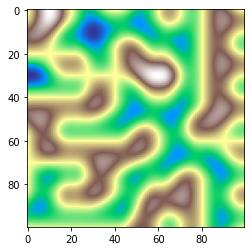

In [76]:
import matplotlib.pyplot as plt

def perlin(x,y,seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256,dtype=int)
    np.random.shuffle(p)
    p = np.stack([p,p]).flatten()
    # coordinates of the top-left
    xi = x.astype(int)
    yi = y.astype(int)
    # internal coordinates
    xf = x - xi
    yf = y - yi
    # fade factors
    u = fade(xf)
    v = fade(yf)
    # noise components
    n00 = gradient(p[p[xi]+yi],xf,yf)
    n01 = gradient(p[p[xi]+yi+1],xf,yf-1)
    n11 = gradient(p[p[xi+1]+yi+1],xf-1,yf-1)
    n10 = gradient(p[p[xi+1]+yi],xf-1,yf)
    # combine noises
    x1 = lerp(n00,n10,u)
    x2 = lerp(n01,n11,u) # FIX1: I was using n10 instead of n01
    return lerp(x1,x2,v) # FIX2: I also had to reverse x1 and x2 here

def lerp(a,b,x):
    "linear interpolation"
    return a + x * (b-a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

lin = np.linspace(0,5,100,endpoint=False)
x,y = np.meshgrid(lin,lin) # FIX3: I thought I had to invert x and y here but it was a mistake

plt.imshow(perlin(x,y,seed=4),origin='upper', cmap='terrain');